In [1]:
! kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [3]:
! mv kaggle.json /root/.kaggle/kaggle.json

In [4]:
! kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: too few arguments


In [5]:
! kaggle datasets download ellenyusa/4classimages

 86% 33.0M/38.5M [00:01<00:00, 9.38MB/s]
100% 38.5M/38.5M [00:01<00:00, 24.2MB/s]


In [6]:
! unzip --qq 4classimages.zip

In [7]:
! rm -rf data/data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
idg = ImageDataGenerator()

In [114]:
gen = idg.flow_from_directory("data", batch_size=100, target_size=(200, 200))

Found 808 images belonging to 4 classes.


In [115]:
gen.class_indices

{'Humans': 0, 'cats': 1, 'dogs': 2, 'horses': 3}

In [116]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, MaxPooling2D, Dropout

In [117]:
resmodel = ResNet50(include_top=False, input_shape=(200, 200, 3))

In [118]:
resmodel.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [119]:
resmodel.trainable = False

In [120]:
flat = Flatten()(resmodel.output)
d1 = Dense(2000, activation="relu")(flat)
d2 = Dense(800, activation="relu")(d1)
d3 = Dense(200, activation="relu")(d2)
drop1 = Dropout(.2)(d3)
d4 = Dense(100, activation="relu")(drop1)
d5 = Dense(50, activation="relu")(d4)
drop2 = Dropout(.2)(d5)
out_layer = Dense(4, activation="softmax")(drop2)

In [121]:
model = Model(resmodel.input, out_layer)

In [122]:
# model.summary()

In [123]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [124]:
model.fit_generator(gen, steps_per_epoch=8, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 11s 672ms/step - loss: 19.2056 - accuracy: 0.3814
Epoch 2/10
8/8 [==============================] - 6s 662ms/step - loss: 5.8477 - accuracy: 0.7063
Epoch 3/10
8/8 [==============================] - 5s 614ms/step - loss: 2.7486 - accuracy: 0.7895
Epoch 4/10
8/8 [==============================] - 6s 663ms/step - loss: 1.0189 - accuracy: 0.8737
Epoch 5/10
8/8 [==============================] - 5s 617ms/step - loss: 0.3998 - accuracy: 0.9308
Epoch 6/10
8/8 [==============================] - 6s 666ms/step - loss: 0.3314 - accuracy: 0.9538
Epoch 7/10
8/8 [==============================] - 5s 685ms/step - loss: 0.1127 - accuracy: 0.9689
Epoch 8/10
8/8 [==============================] - 5s 615ms/step - loss: 0.0807 - accuracy: 0.9788
Epoch 9/10
8/8 [==============================] - 6s 668ms/step - loss: 0.0418 - accuracy: 0.9862
Epoch 10/10
8/8 [==============================] - 5s 625ms/step - loss: 0.0473 - accuracy: 0.9901


In [125]:
import requests

In [154]:
url = r"https://bsmedia.business-standard.com/_media/bs/img/article/2021-02/03/full/1612372052-5838.jpg"
with open("myimg.png", "wb") as f:
  f.write(requests.get(url).content)


In [155]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [156]:
from tensorflow.keras.preprocessing.image import load_img

In [157]:
img = load_img("myimg.png", target_size=(200, 200))

In [158]:
mpimg = np.array(img)

In [159]:
result = model.predict(np.array([mpimg]))

In [160]:
result.argmax(axis=1)

array([0])

In [153]:
gen.class_indices

{'Humans': 0, 'cats': 1, 'dogs': 2, 'horses': 3}

In [66]:
import cv2

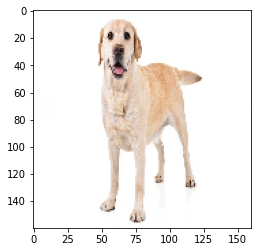

In [93]:
plt.imshow(mpimg)